In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

%matplotlib notebook

In [2]:
"""Function Definitions"""
def velocity(x):
  return x * (8 - x)

def distance(x):
  return 4 * np.power(x, 2) - (1 / 3) * np.power(x, 3)

In [3]:
"""Initial Constants"""
lower_initial = 0
upper_initial = 8
length = 2000

---

# Velocity 

TypeError: 'Line2D' object is not iterable

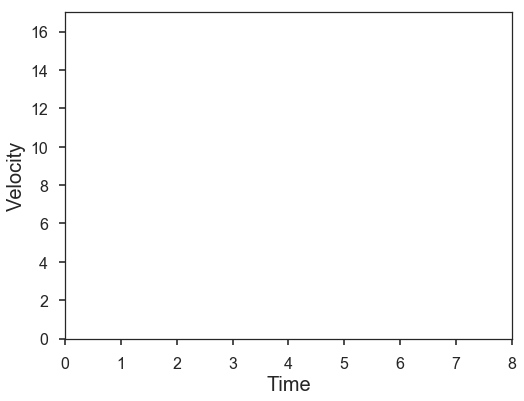

In [4]:
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object  
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity

def animate_velocity(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
def init_velocity():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  return v

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_velocity, steps, 
                    init_func=init_velocity, interval=100, blit=True)
plt.show()

---

# Distance

<IPython.core.display.Javascript object>


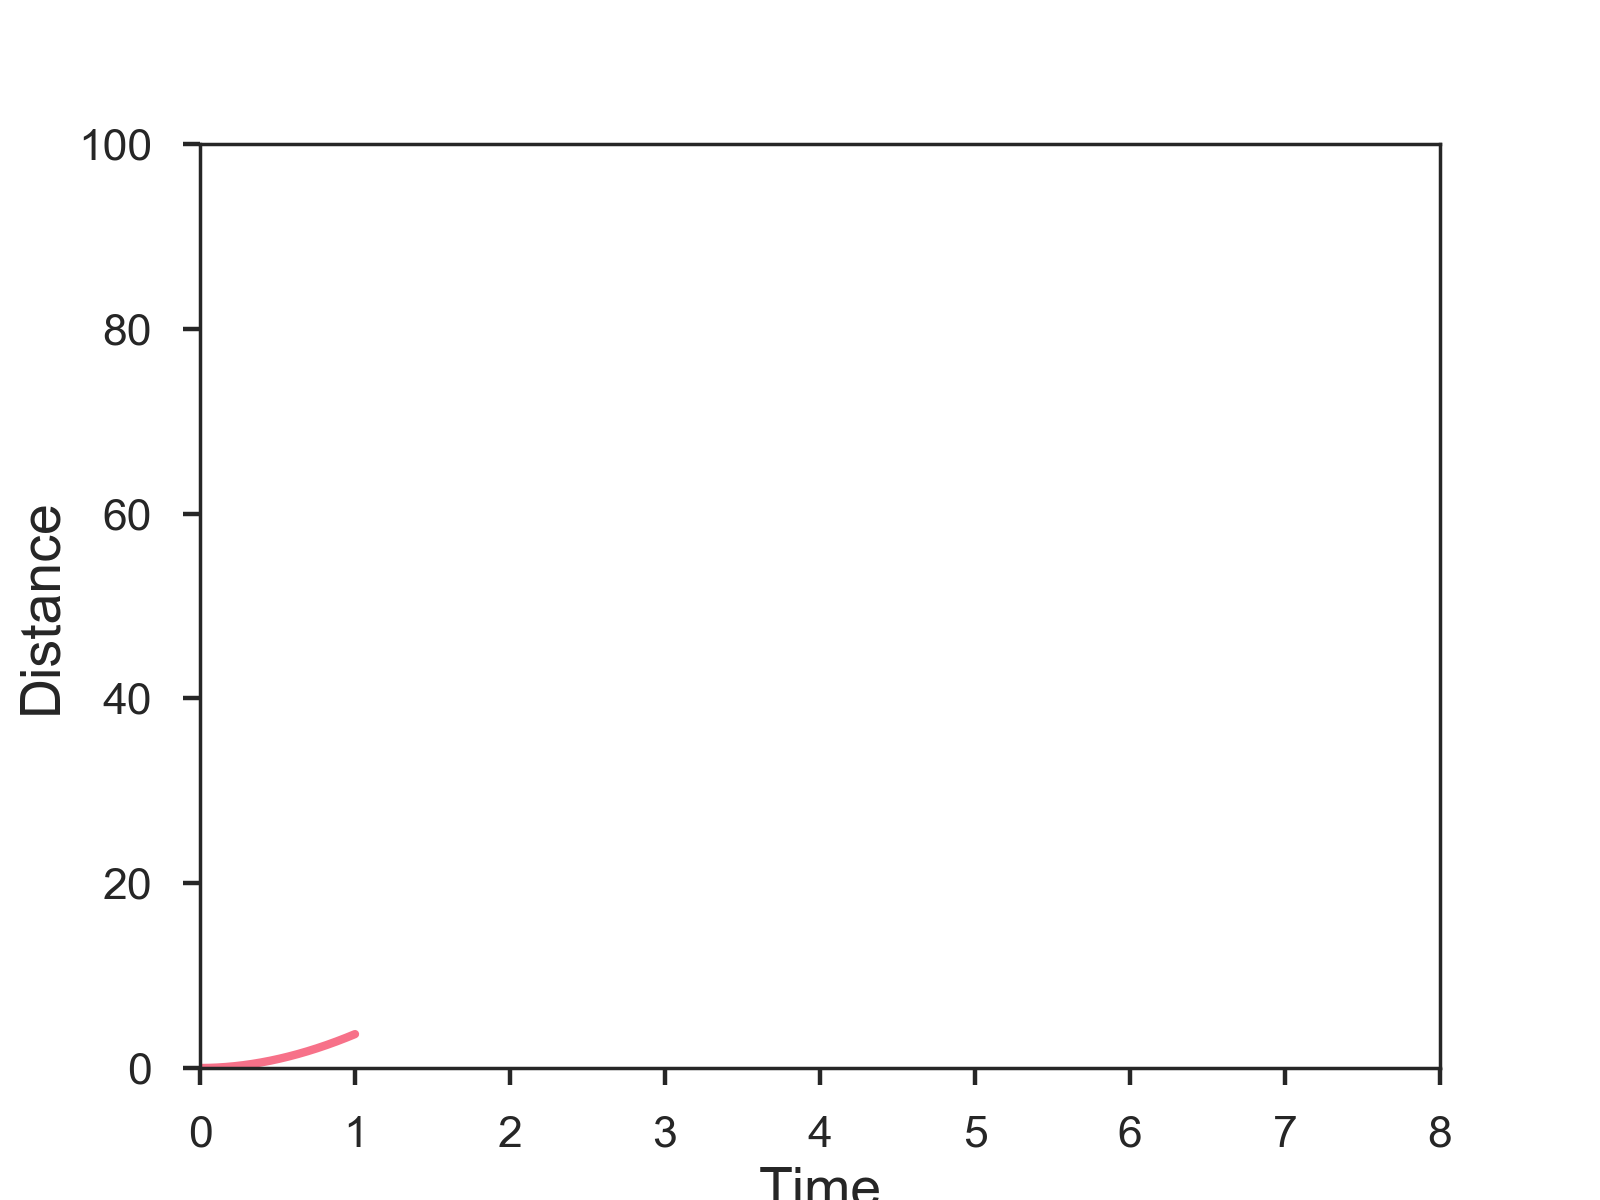

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_distance, steps, 
                    init_func=init_distance, interval=100, blit=True)
plt.show()

---

# Velocity and Distance

<IPython.core.display.Javascript object>


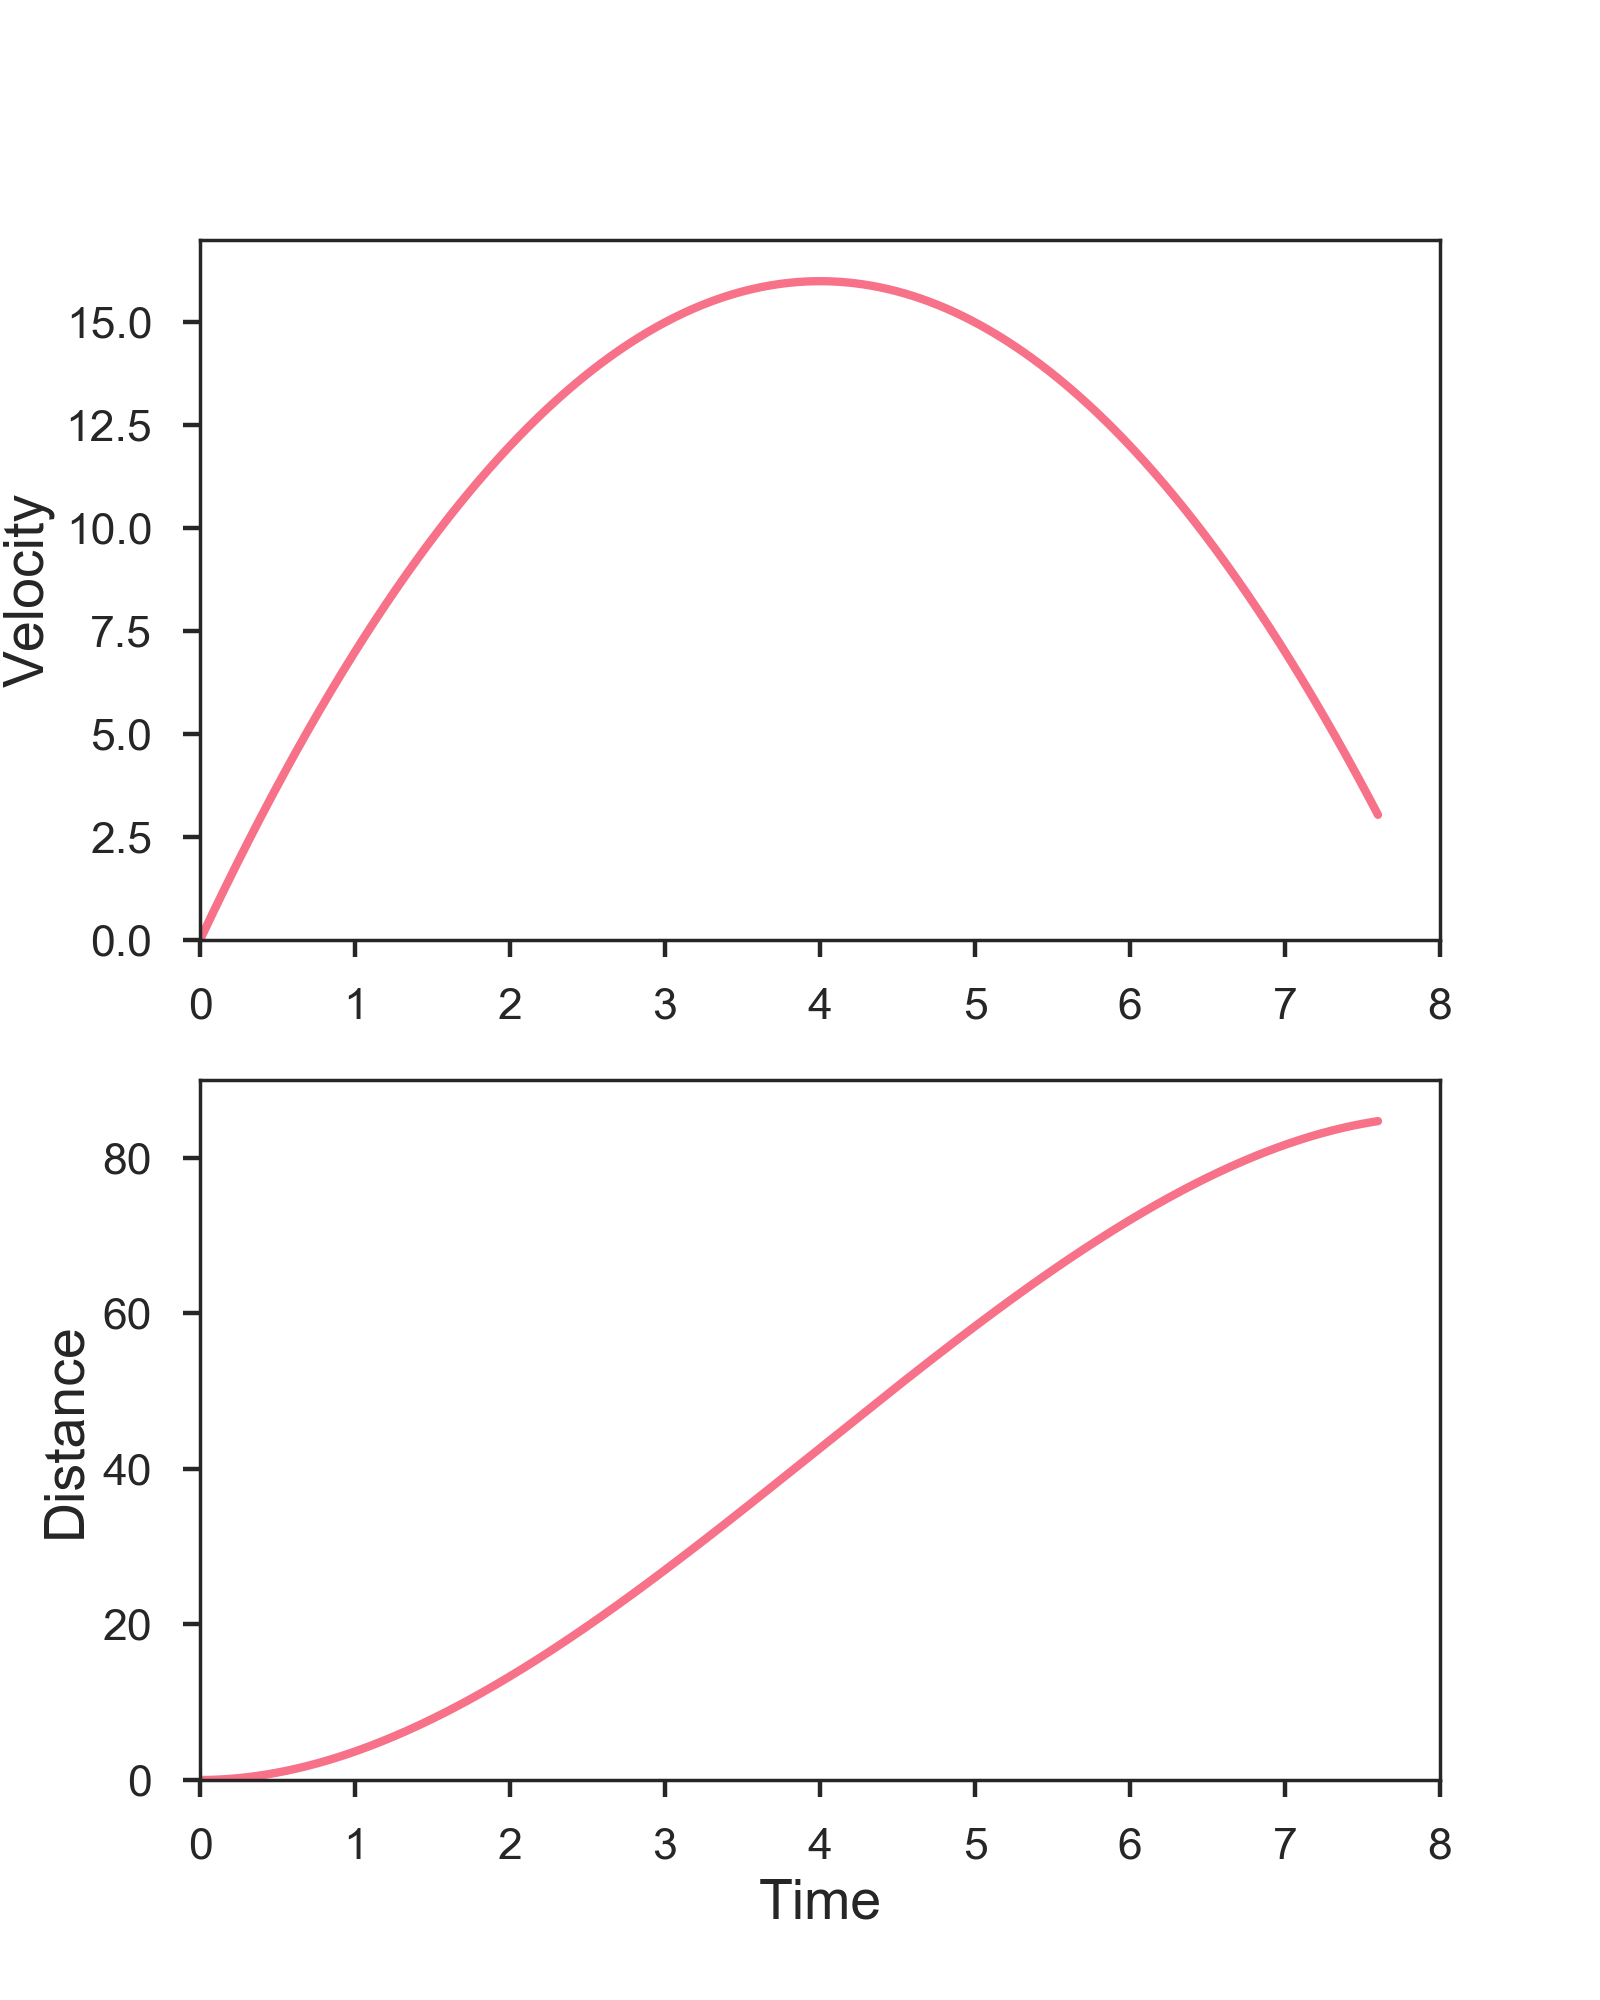

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  dist = distance(x)
  d.set_data(x, dist)          
  
def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_v_d, steps, 
                    init_func=init_v_d, interval=100, blit=True)
plt.show()

---

# Velocity and Distance...or should we say area under velocity curve

<IPython.core.display.Javascript object>


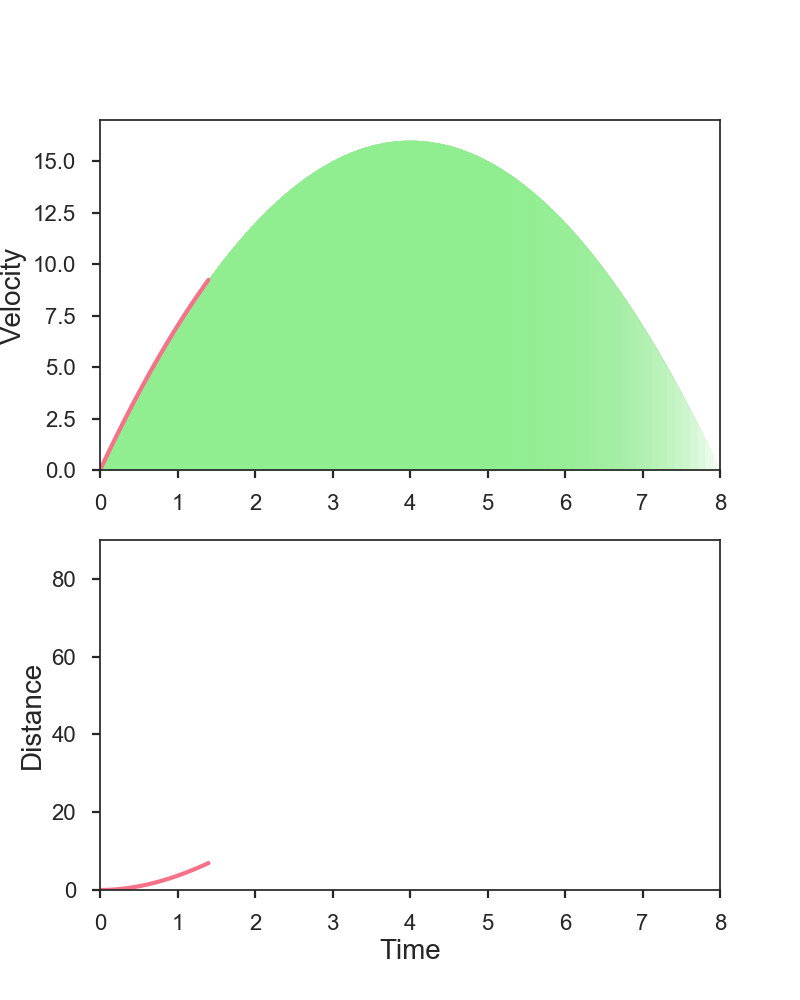

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  collection = ax1.fill_between(x, vel, color='lightgreen', alpha='0.1')
  path = collection.get_paths()[0]
  path.vertices[:, 1] 
  
  dist = distance(x)
  d.set_data(x, dist)    

def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8.1, step)
ani = FuncAnimation(fig, animate_v_d, steps, 
                    init_func=init_v_d, interval=50, blit=True)

plt.show()

So the main thing to note is look at how the area is changing under the velocity curve...it is changing maximally at time t = 4, which is when the distance has the highest slope. The rate at which the area under the velocity curve changes is equal to the rate at which distance changes given a certain x!!!!! What is CRAZY is that the rate at which the area under the velocity curve changes at a given x is just the value of the velocity curve at that x. THIS IS BECAUSE VELOCITY IS THE DERIVATIVE OF DISTANCE. So, in other words, the area under the velocity curve is distance, and if we want to see how the area (distance) is changing we can just look at the value of velocity at that location. Based on this relationship, we can determine the formula for distance based on whatever equation, when its derivative was taken, would have yielded the velocity equation. 